In [1]:
from matplotlib import pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
np.random.seed(0)

In [3]:
# 構造方程式の設定

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f_X1(sample_size):
    return np.random.binomial(1, 0.5, sample_size)

def f_X2(sample_size):
    return np.random.normal(0, 1, sample_size)

def f_X3(X1, X2, sample_size):
    p = sigmoid(-0.3+0.9*X1-11.2*X2)
    return np.random.binomial(1, p, sample_size)

def f_T(X1, X2, sample_size):
    p = sigmoid(-0.5+1.2*X1+0.8*X2)
    return np.random.binomial(1, p, sample_size)

def f_X4(T, X3, sample_size):
    return 3 + 2.5*T + 3*X3 + np.random.normal(0, np.sqrt(1.5), sample_size)

def f_X5(X4, sample_size):
    return 100 + 10*X4 + np.random.normal(0, np.sqrt(20), sample_size)

def f_Y(X1, X3, X5, sample_size):
    return 1000 + 100*X1 + 500*X3 + 15*X5 + np.random.normal(0, np.sqrt(100), sample_size)

In [4]:
# データの生成

sample_size = 200
X1 = f_X1(sample_size)
X2 = f_X2(sample_size)
X3 = f_X3(X1, X2, sample_size)
T = f_T(X1, X2, sample_size)
X4 = f_X4(T, X3, sample_size)
X5 = f_X5(X4, sample_size)
Y = f_Y(X1, X3, X5, sample_size)

df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'T': T,
    'X4': X4,
    'X5': X5,
    'Y': Y
})

In [5]:
# T=0と介入した場合のデータの生成

sample_size = 10000
X1 = f_X1(sample_size)
X2 = f_X2(sample_size)
X3 = f_X3(X1, X2, sample_size)
T = np.zeros(sample_size)
X4 = f_X4(T, X3, sample_size)
X5 = f_X5(X4, sample_size)
Y = f_Y(X1, X3, X5, sample_size)

df_0 = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'T': T,
    'X4': X4,
    'X5': X5,
    'Y': Y
})

In [6]:
# T=1と介入した場合のデータの生成

sample_size = 10000
X1 = f_X1(sample_size)
X2 = f_X2(sample_size)
X3 = f_X3(X1, X2, sample_size)
T = np.ones(sample_size)
X4 = f_X4(T, X3, sample_size)
X5 = f_X5(X4, sample_size)
Y = f_Y(X1, X3, X5, sample_size)

df_1 = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'T': T,
    'X4': X4,
    'X5': X5,
    'Y': Y
})

In [7]:
# 平均因果効果の計算

print('平均因果効果:', df_1['Y'].mean() - df_0['Y'].mean())

平均因果効果: 385.68760196312724


In [8]:
# 傾向スコアの推定

X = df[['X1', 'X2']]
T = df['T'].values

# ロジスティック回帰モデルを用いて傾向スコアを推定
model = LogisticRegression(penalty=None)
model.fit(X, T)
ps_X1X2 = model.predict_proba(X)[:, 1]
df['ps_X1X2'] = ps_X1X2

X = df[['X1', 'X3']]
model = LogisticRegression(penalty=None)
model.fit(X, T)
ps_X1X3 = model.predict_proba(X)[:, 1]
df['ps_X1X3'] = ps_X1X3

X = df[['X1', 'X2', 'X3']]
model = LogisticRegression(penalty=None)
model.fit(X, T)
ps_X1X2X3 = model.predict_proba(X)[:, 1]
df['ps_X1X2X3'] = ps_X1X2X3

X = df[['X1', 'X2', 'X3', 'X4', 'X5']]
model = LogisticRegression(penalty=None)
model.fit(X, T)
ps_X1X2X3X4X5 = model.predict_proba(X)[:, 1]
df['ps_X1X2X3X4X5'] = ps_X1X2X3X4X5

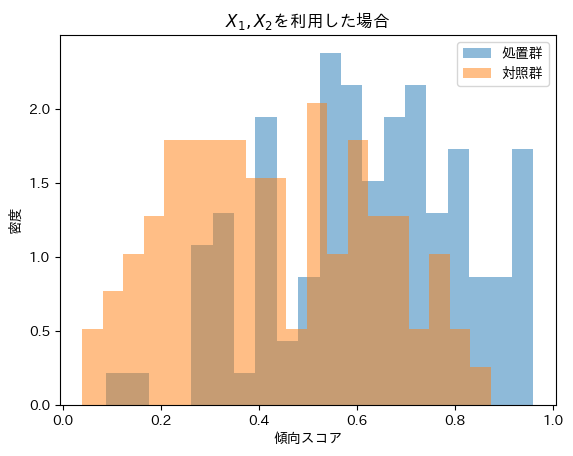

In [9]:
# 処置群と対照群で傾向スコアの分布を比較

plt.hist(df[df['T'] == 1]['ps_X1X2'], bins=20, alpha=0.5, density=True, label='処置群')
plt.hist(df[df['T'] == 0]['ps_X1X2'], bins=20, alpha=0.5, density=True, label='対照群')
plt.xlabel('傾向スコア')
plt.ylabel('密度')
plt.title(r'$X_{1}, X_{2}$を利用した場合')
plt.legend()
plt.show();

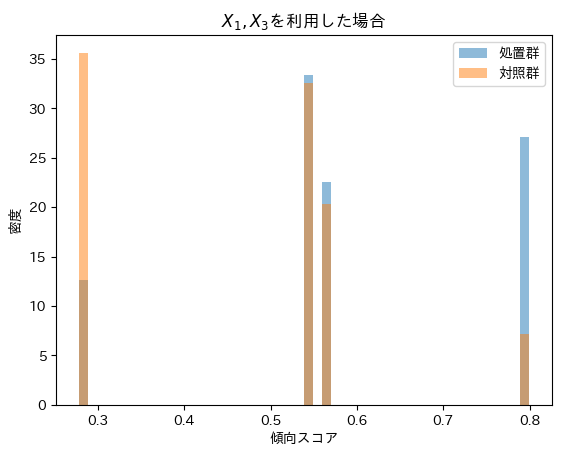

In [10]:
plt.hist(df[df['T'] == 1]['ps_X1X3'], bins=50, alpha=0.5, density=True, label='処置群')
plt.hist(df[df['T'] == 0]['ps_X1X3'], bins=50, alpha=0.5, density=True, label='対照群')
plt.xlabel('傾向スコア')
plt.ylabel('密度')
plt.title(r'$X_{1}, X_{3}$を利用した場合')
plt.legend()
plt.show();

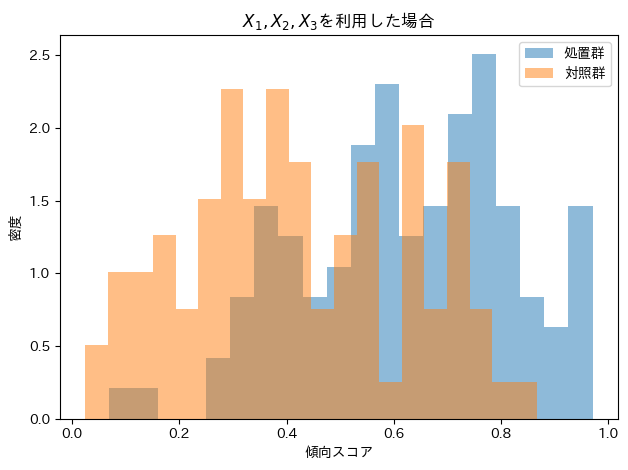

In [11]:
plt.hist(df[df['T'] == 1]['ps_X1X2X3'], bins=20, alpha=0.5, density=True, label='処置群')
plt.hist(df[df['T'] == 0]['ps_X1X2X3'], bins=20, alpha=0.5, density=True, label='対照群')
plt.xlabel('傾向スコア')
plt.ylabel('密度')
plt.title(r'$X_{1}, X_{2}, X_{3}$を利用した場合')
plt.legend()
plt.tight_layout()
plt.show();

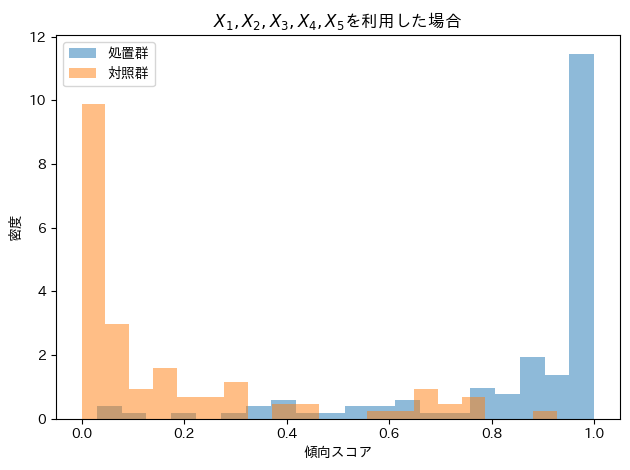

In [12]:
plt.hist(df[df['T'] == 1]['ps_X1X2X3X4X5'], bins=20, alpha=0.5, density=True, label='処置群')
plt.hist(df[df['T'] == 0]['ps_X1X2X3X4X5'], bins=20, alpha=0.5, density=True, label='対照群')
plt.xlabel('傾向スコア')
plt.ylabel('密度')
plt.title(r'$X_{1}, X_{2}, X_{3}, X_{4}, X_{5}$を利用した場合')
plt.legend()
plt.tight_layout()
plt.show();

In [13]:
# 逆確率重み付け推定により平均処置効果を推定

# 逆確率重み付け推定
ipw_estimate_X1X2 = (np.sum(df['T'] * df['Y'] / df['ps_X1X2']) - np.sum((1 - df['T']) * df['Y'] / (1 - df['ps_X1X2']))) / len(df)
ipw_estimate_X1X3 = (np.sum(df['T'] * df['Y'] / df['ps_X1X3']) - np.sum((1 - df['T']) * df['Y'] / (1 - df['ps_X1X3']))) / len(df)
ipw_estimate_X1X2X3 = (np.sum(df['T'] * df['Y'] / df['ps_X1X2X3']) - np.sum((1 - df['T']) * df['Y'] / (1 - df['ps_X1X2X3']))) / len(df)
ipw_estimate_X1X2X3X4X5 = (np.sum(df['T'] * df['Y'] / df['ps_X1X2X3X4X5']) - np.sum((1 - df['T']) * df['Y'] / (1 - df['ps_X1X2X3X4X5']))) / len(df)

print(f'X1, X2により傾向スコア推定した場合: {ipw_estimate_X1X2}')
print(f'X1, X3により傾向スコア推定した場合: {ipw_estimate_X1X3}')
print(f'X1, X2, X3により傾向スコア推定した場合: {ipw_estimate_X1X2X3}')
print(f'X1, X2, X3, X4, X5により傾向スコア推定した場合: {ipw_estimate_X1X2X3X4X5}')

X1, X2により傾向スコア推定した場合: 535.0395159727033
X1, X3により傾向スコア推定した場合: 417.6818816394522
X1, X2, X3により傾向スコア推定した場合: 582.2401997677097
X1, X2, X3, X4, X5により傾向スコア推定した場合: 1065.0718986303743
